In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import OrdinalEncoder


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [317]:
def toMB(value):
    try :
        if 'MB' in value:
            return int(float(value.replace('MB', '').strip()))
        elif 'GB' in value:
            return int(float(value.replace('GB', '').strip()) * 1024)
        elif 'TB' in value:
            return int(float(value.replace('TB', '').strip()) * 1024 * 1024)
    except:
        print(value)
        return value
    
def conversiontoMB(data):
    data_converted = data.copy()
    data_converted['Memory'] = data['Memory'].dropna().apply(toMB)
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 32 GB", "32 GB")
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 16 GB", "16 GB")
    data_converted['Storage'] = data_converted['Storage'].dropna().apply(toMB)
    return data_converted


In [318]:
data = pd.read_csv('Sales.csv')
data

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


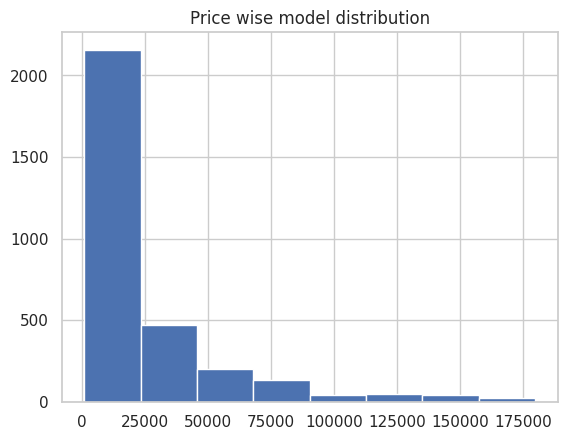

In [319]:
plt.figure()
plt.title('Price wise model distribution')
plt.hist(data['Selling Price'],bins=8)
plt.show()

In [320]:
def categorize(data):
    if (data>50000):
        return "Premium"
    elif(data>20000):
        return "Mid-Range"
    else:
        return "Budget"

In [321]:
data = data.dropna()
print(data.isna().sum())

Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64


# cleaning of data

In [322]:
data = conversiontoMB(data)
data = data.dropna()
data = data.drop(columns=['Camera'])
data


,Brands,Models,Colors,Memory,Storage,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8192,131072,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2048,16384,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4096,65536,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4096,65536,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8,16,4.0,2199,2199,GIONEE L800,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512,4096,4.0,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000
3108,SAMSUNG,Metro 313,Black,4,2,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6144,131072,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3111,Apple,iPhone SE,White,2048,131072,4.5,44900,44900,Apple iPhone SE,0,0.000000


# Categorisation of Models

In [323]:
data.loc[:, 'Category'] = data['Selling Price'].apply(categorize)
data

,Brands,Models,Colors,Memory,Storage,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Category
0,SAMSUNG,GALAXY M31S,Mirage Black,8192,131072,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,Budget
1,Nokia,3.2,Steel,2048,16384,3.8,10199,10199,Nokia 3.2,0,0.000000,Budget
3,Infinix,Note 5,Ice Blue,4096,65536,4.2,12999,12999,Infinix Note 5,0,0.000000,Budget
4,Apple,iPhone 11,Black,4096,65536,4.6,49900,49900,Apple iPhone 11,0,0.000000,Mid-Range
5,GIONEE,L800,Black,8,16,4.0,2199,2199,GIONEE L800,0,0.000000,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512,4096,4.0,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000,Budget
3108,SAMSUNG,Metro 313,Black,4,2,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000,Budget
3109,POCO,M4 Pro 5G,Cool Blue,6144,131072,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750,Budget
3111,Apple,iPhone SE,White,2048,131072,4.5,44900,44900,Apple iPhone SE,0,0.000000,Mid-Range


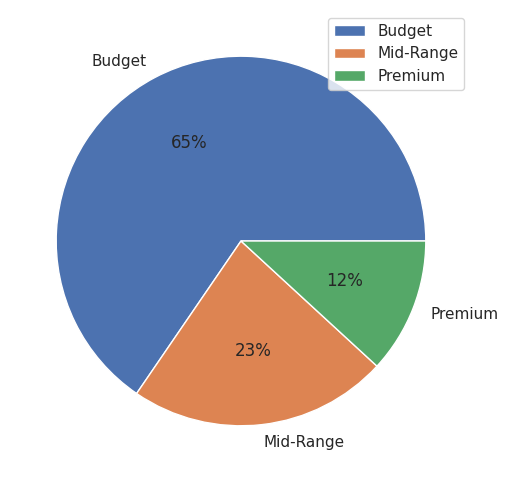

In [324]:
plt.figure(figsize=(9,6))
plt.pie(data['Category'].value_counts(),labels=data['Category'].value_counts().index, autopct='%1.0f%%')
plt.legend(loc='best')
plt.show()

In [325]:
data.describe(include='object')['Category']


count       2897
unique         3
top       Budget
freq        1896
Name: Category, dtype: object

In [326]:
#categories = data['Category'].value_counts().index.tolist()
#categories

In [327]:
'''
data_encoded = pd.get_dummies(data, columns=['Category'])
encoded_columns = [f'Category_{category}' for category in categories]
# Convert the columns to integers
data_encoded[encoded_columns] = data_encoded[encoded_columns].astype(int)
data_encoded
'''

"\ndata_encoded = pd.get_dummies(data, columns=['Category'])\nencoded_columns = [f'Category_{category}' for category in categories]\n# Convert the columns to integers\ndata_encoded[encoded_columns] = data_encoded[encoded_columns].astype(int)\ndata_encoded\n"

# Encoding data

In [328]:
categorical_columns = data.select_dtypes(include=['object']).columns

ordinal_encoder = OrdinalEncoder()

data[categorical_columns] = ordinal_encoder.fit_transform(data[categorical_columns])
data

,Brands,Models,Colors,Memory,Storage,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Category
0,13.0,274.0,349.0,8192,131072,4.3,19330,20999,529.0,1669,7.947998,0.0
1,10.0,44.0,546.0,2048,16384,3.8,10199,10199,398.0,0,0.000000,0.0
3,6.0,560.0,266.0,4096,65536,4.2,12999,12999,174.0,0,0.000000,0.0
4,1.0,854.0,45.0,4096,65536,4.6,49900,49900,29.0,0,0.000000,1.0
5,2.0,484.0,45.0,8,16,4.0,2199,2199,75.0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,13.0,403.0,45.0,512,4096,4.0,5999,5999,655.0,0,0.000000,0.0
3108,13.0,520.0,45.0,4,2,4.2,2299,2299,704.0,0,0.000000,0.0
3109,12.0,504.0,128.0,6144,131072,4.4,16999,19999,523.0,3000,15.000750,0.0
3111,1.0,872.0,610.0,2048,131072,4.5,44900,44900,47.0,0,0.000000,1.0


In [329]:
#categories = data['Category'].value_counts().index.tolist()
#categories

# ML methods

In [330]:
features = data[['Memory', 'Storage','Rating','Discount','Brands','Models','Discount','discount percentage','Selling Price']]
label = data[['Category']]

In [331]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
print(y_train)

# Reshape the target variable
y_train = y_train.values.ravel()
#print(y_train)
y_test = y_test.values.ravel()

      Category
179        0.0
2344       0.0
280        0.0
2578       0.0
1548       2.0
...        ...
1764       0.0
1176       0.0
1215       1.0
1393       1.0
927        0.0

[2317 rows x 1 columns]


## Naive Bayes

In [332]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred)
precision_gnb = precision_score(y_test, y_pred, average='weighted')
recall_gnb = recall_score(y_test, y_pred, average='weighted')
f1_gnb = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy_gnb}")
print(f"Precision: {precision_gnb}")
print(f"Recall: {recall_gnb}")
print(f"F1 Score: {f1_gnb}")

print(classification_report(y_test, y_pred))


Accuracy: 0.9275862068965517
Precision: 0.928008566847735
Recall: 0.9275862068965517
F1 Score: 0.9277617878775882
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       383
         1.0       0.83      0.84      0.84       129
         2.0       0.95      0.93      0.94        68

    accuracy                           0.93       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.93      0.93      0.93       580



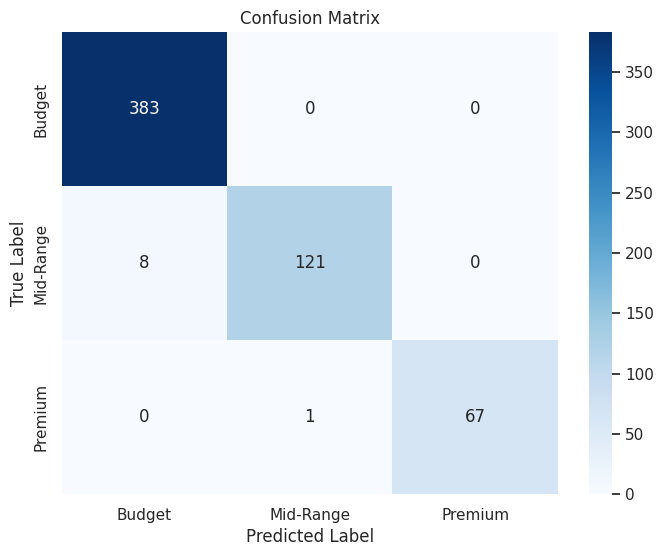

In [333]:
class_names = ['Budget', 'Mid-Range', 'Premium']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Logistic Regression

In [334]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
f1_lr = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Accuracy: 0.746551724137931
Precision: 0.7593834442427908
Recall: 0.746551724137931
F1 Score: 0.7518364941834567


/home/rishav/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


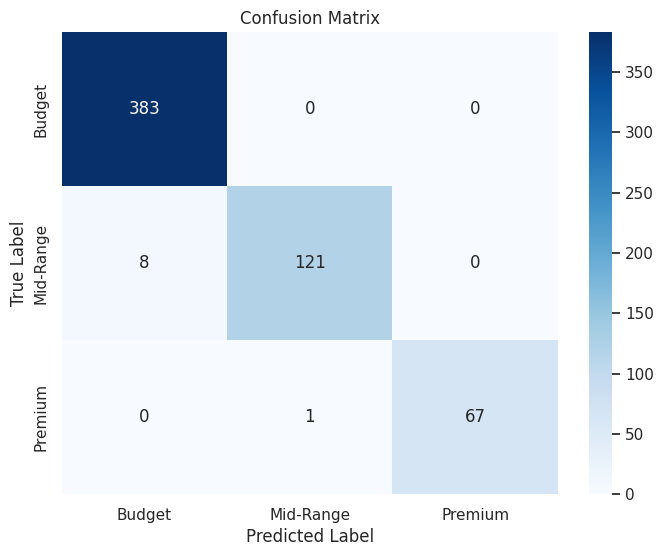

In [335]:
class_names = ['Budget', 'Mid-Range', 'Premium']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Decision Tree Classifier

In [336]:
# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred)
precision_dtc = precision_score(y_test, y_pred, average='weighted')
recall_dtc = recall_score(y_test, y_pred, average='weighted')
f1_dtc = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_dtc}")
print(f"Precision: {precision_dtc}")
print(f"Recall: {recall_dtc}")
print(f"F1 Score: {f1_dtc}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


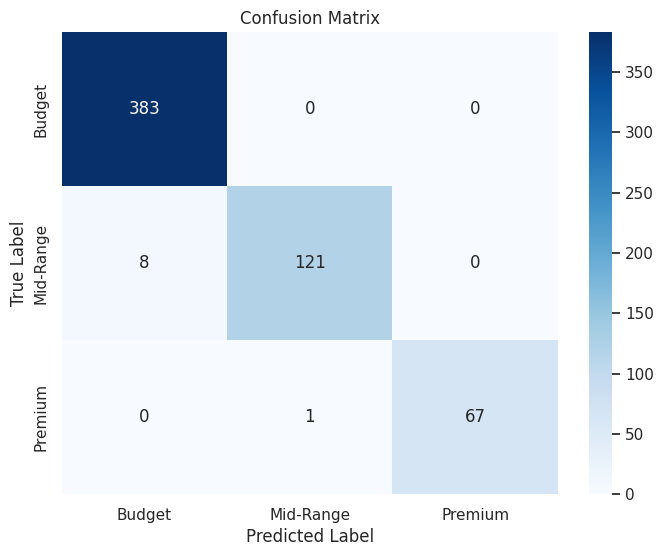

In [337]:
class_names = ['Budget', 'Mid-Range', 'Premium']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Random Forest Classifier

In [338]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred, average='weighted')
recall_rfc = recall_score(y_test, y_pred, average='weighted')
f1_rfc = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_rfc}")
print(f"Precision: {precision_rfc}")
print(f"Recall: {recall_rfc}")
print(f"F1 Score: {f1_rfc}")



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


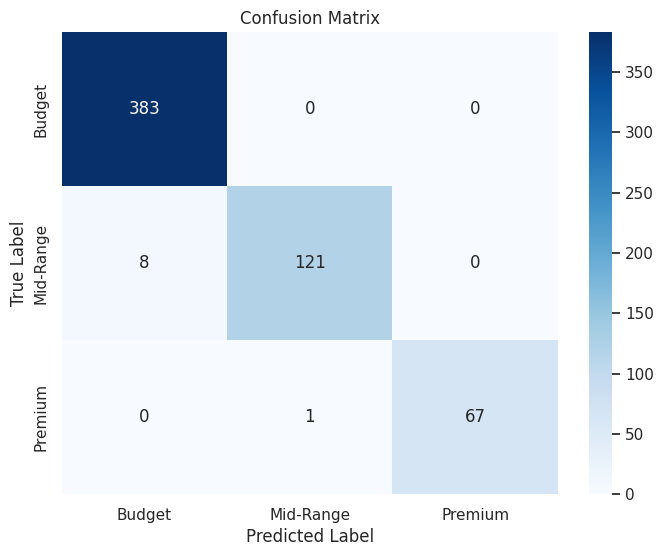

In [339]:
class_names = ['Budget', 'Mid-Range', 'Premium']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## KNN

In [340]:
# Initialize and train the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
# Make predictions and evaluate
y_pred = model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
f1_knn = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

Accuracy: 0.9844827586206897
Precision: 0.9846660445090857
Recall: 0.9844827586206897
F1 Score: 0.9843312792372049


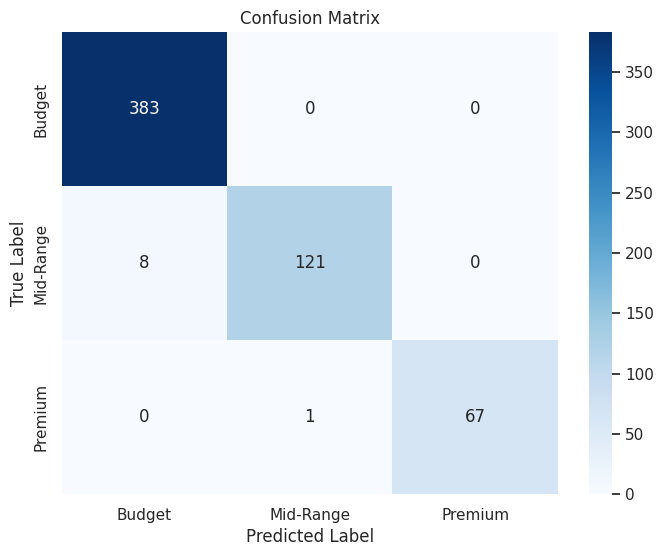

In [341]:
class_names = ['Budget', 'Mid-Range', 'Premium']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [342]:
ml_models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [accuracy_gnb, accuracy_lr, accuracy_dtc, accuracy_rfc, accuracy_knn],
    'Precision': [precision_gnb, precision_lr, precision_dtc, precision_rfc, precision_knn],
    'Recall': [recall_gnb, recall_lr, recall_dtc, recall_rfc, recall_knn],
    'F1 Score': [f1_gnb, f1_lr, f1_dtc, f1_rfc, f1_knn]
})
ml_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Gaussian Naive Bayes,0.927586,0.928009,0.927586,0.927762
1,Logistic Regression,0.746552,0.759383,0.746552,0.751836
2,Decision Tree,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000
4,KNN,0.984483,0.984666,0.984483,0.984331


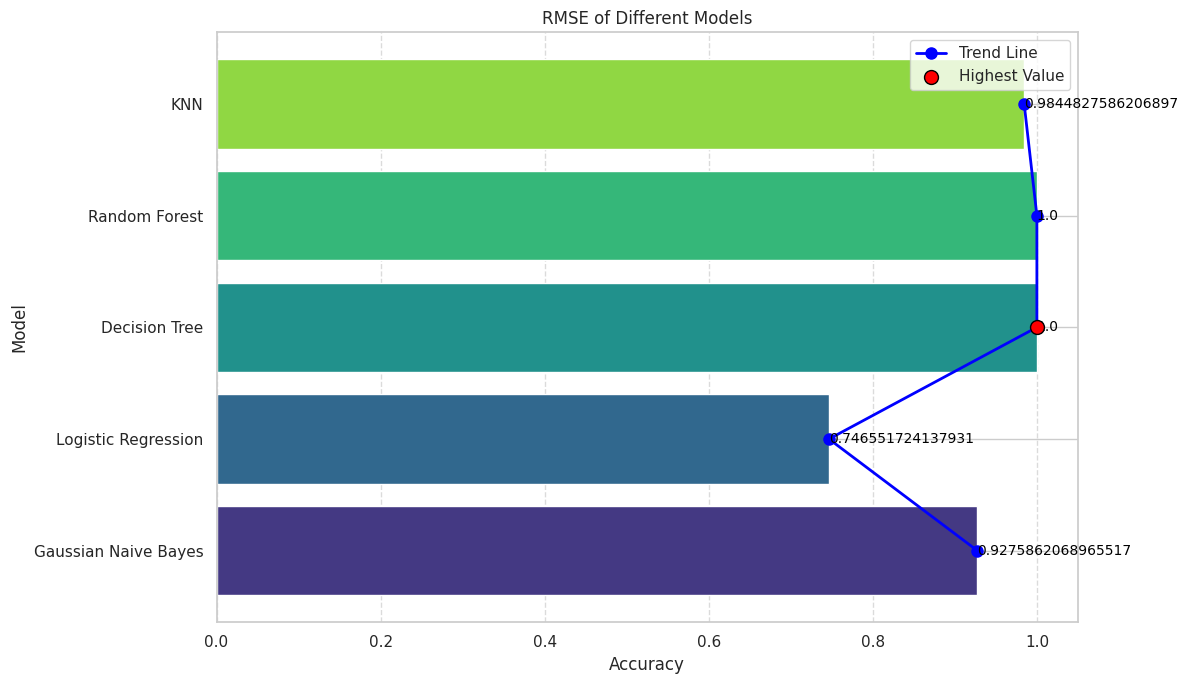

In [343]:
# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title('RMSE of Different Models')

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(ml_models))
bars = plt.barh(ml_models['Model'], ml_models['Accuracy'], color=custom_palette)

# Add a trend line
x = np.arange(len(ml_models))
plt.plot(ml_models['Accuracy'], x, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

# Mark the highest value
max_value = ml_models['Accuracy'].max()
max_index = ml_models['Model'][ml_models['Accuracy'].idxmax()]
plt.scatter(max_value, ml_models['Model'][ml_models['Accuracy'].idxmax()], color='red', s=100, edgecolor='black', zorder=5, label='Highest Value')

# Add a legend
plt.legend()

# Customize x-axis and y-axis labels
plt.xlabel('Accuracy')
plt.ylabel('Model')

# Show the plot
plt.tight_layout()
plt.show()

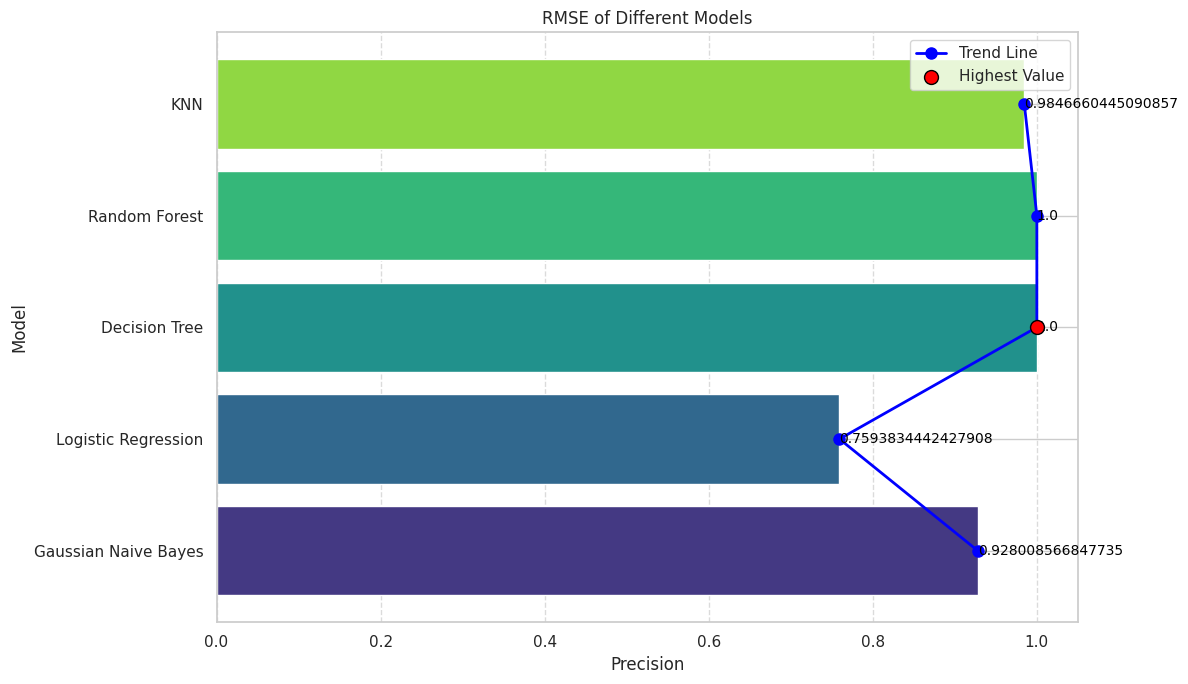

In [344]:
# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title('RMSE of Different Models')

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(ml_models))
bars = plt.barh(ml_models['Model'], ml_models['Precision'], color=custom_palette)

# Add a trend line
x = np.arange(len(ml_models))
plt.plot(ml_models['Precision'], x, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

# Mark the highest value
max_value = ml_models['Precision'].max()
max_index = ml_models['Model'][ml_models['Precision'].idxmax()]
plt.scatter(max_value, ml_models['Model'][ml_models['Precision'].idxmax()], color='red', s=100, edgecolor='black', zorder=5, label='Highest Value')

# Add a legend
plt.legend()

# Customize x-axis and y-axis labels
plt.xlabel('Precision')
plt.ylabel('Model')

# Show the plot
plt.tight_layout()
plt.show()

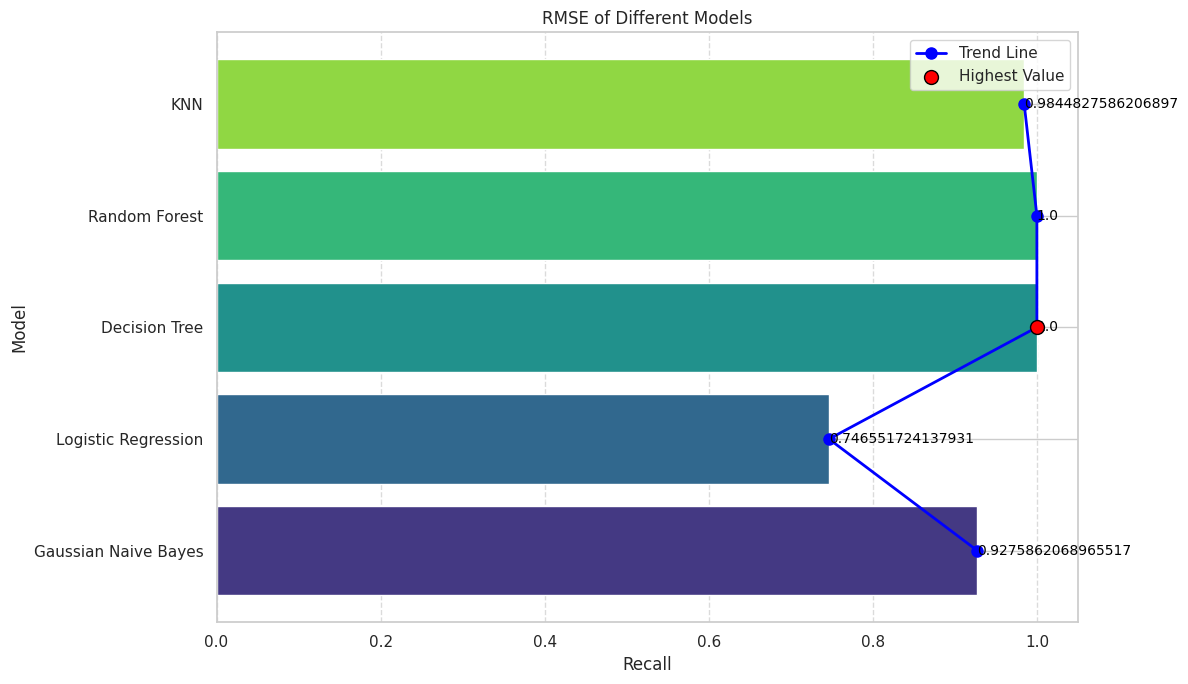

In [345]:
# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title('RMSE of Different Models')

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(ml_models))
bars = plt.barh(ml_models['Model'], ml_models['Recall'], color=custom_palette)

# Add a trend line
x = np.arange(len(ml_models))
plt.plot(ml_models['Recall'], x, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

# Mark the highest value
max_value = ml_models['Recall'].max()
max_index = ml_models['Model'][ml_models['Recall'].idxmax()]
plt.scatter(max_value, ml_models['Model'][ml_models['Recall'].idxmax()], color='red', s=100, edgecolor='black', zorder=5, label='Highest Value')

# Add a legend
plt.legend()

# Customize x-axis and y-axis labels
plt.xlabel('Recall')
plt.ylabel('Model')

# Show the plot
plt.tight_layout()
plt.show()